<a href="https://colab.research.google.com/github/n3xtss/CourseWork/blob/main/Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install necessary packages
install.packages("sqldf")
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Load libraries
library(sqldf)
library(dplyr)
library(ggplot2)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
#Step 1; Load the dataset from github

# Read CSV from GitHub
url <- "https://raw.githubusercontent.com/n3xtss/CourseWork/refs/heads/main/greenfuture_ideas_dataset.csv"
data <- read.csv(url)

# Preview
head(data)

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No


In [7]:
#Step 2; SQL queries

# Query 1: Select approved ideas that are not a security concern and have already started
approved <- sqldf("SELECT * FROM data
                  WHERE `Approval.Status` = 'Approved' AND `Security.Concern.Flag` = 'No' AND `Implementation.Status` != 'Not Started'
                  ORDER BY `Number.of.Votes` DESC")


# Query 2: Get top 5 ideas with most votes that have been approved and order by the number of votes
top5ideas <- sqldf("SELECT * FROM data
                    WHERE `Office.Location` != 'China' AND `Approval.Status` = 'Approved'
                    ORDER BY `Number.of.Votes` DESC ")

head(approved)
head(top5ideas)

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,de5ed43f,USA,Technology,09/03/2024,Idea 2310,Renewable Energy,499,Cross-Regional Team,Approved,In Progress,No
2,0509f995,South Africa,Urban Development,15/10/2023,Idea 1810,Smart Cities,497,Single Contributor,Approved,In Progress,No
3,4f81ff0e,China,Infrastructure,10/01/2024,Idea 2559,Smart Cities,497,Single Contributor,Approved,In Progress,No
4,a3790157,Australia,Urban Development,09/04/2023,Idea 2824,Circular Economy,497,Single Contributor,Approved,In Progress,No
5,5aca5661,South Africa,Technology,27/05/2024,Idea 924,Sustainable Transport,496,Single Contributor,Approved,In Progress,No
6,1a4c4fc6,UK,Technology,13/05/2024,Idea 1984,Circular Economy,496,Cross-Regional Team,Approved,Completed,No


,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,7d239d23,USA,Urban Development,18/10/2024,Idea 1020,Circular Economy,500,Cross-Regional Team,Approved,In Progress,Yes
2,de5ed43f,USA,Technology,09/03/2024,Idea 2310,Renewable Energy,499,Cross-Regional Team,Approved,In Progress,No
3,4b644995,USA,Renewable Energy,04/06/2024,Idea 1876,Renewable Energy,498,Single Contributor,Approved,Not Started,No
4,0509f995,South Africa,Urban Development,15/10/2023,Idea 1810,Smart Cities,497,Single Contributor,Approved,In Progress,No
5,a3790157,Australia,Urban Development,09/04/2023,Idea 2824,Circular Economy,497,Single Contributor,Approved,In Progress,No
6,634c4f72,South Africa,Technology,26/07/2023,Idea 761,Water Management,496,Cross-Regional Team,Approved,Not Started,No


In [9]:
#Step 3; Aggregate Functions

# Count ideas per department
ideasDept <- sqldf("SELECT Department, COUNT(*) AS Total_Ideas
                    FROM data
                    GROUP BY Department
                    ORDER by Total_Ideas DESC")

# Average votes by office
avgVotesOffice <- sqldf("SELECT `Office.Location`, AVG(`Number.of.Votes`) AS Avg_Votes
                         FROM data
                         GROUP BY `Office.Location`
                         ORDER BY Avg_Votes DESC")




# Max votes by category
maxVotesCat <- sqldf("SELECT `Idea.Category`, MAX(`Number.of.Votes`) AS Max_Votes
                      FROM data
                      GROUP BY `Idea.Category`
                      ORDER BY Max_Votes DESC")

head(ideasDept)
head(avgVotesOffice)
head(maxVotesCat)


,Department,Total_Ideas
,<chr>,<int>
1,Infrastructure,547
2,Renewable Energy,513
3,Environmental Policy,499
4,Research,498
5,Urban Development,486
6,Technology,457


,Office.Location,Avg_Votes
,<chr>,<dbl>
1,Mexico,264.7542
2,Japan,263.2432
3,Brazil,254.9207
4,Australia,254.5205
5,USA,250.7801
6,China,248.9714


,Idea.Category,Max_Votes
,<chr>,<int>
1,Water Management,500
2,Sustainable Transport,500
3,Renewable Energy,500
4,Circular Economy,500
5,Carbon Capture,499
6,Smart Cities,498


In [13]:
#Step 4; Business Analysis

# Find departments with most approved ideas
deptVotes <- sqldf("SELECT Department, COUNT(*) AS Approved_Ideas
                    FROM data
                    WHERE `Approval.Status` = 'Approved' GROUP BY Department
                    ORDER BY Approved_Ideas DESC")

# Find top collaborating regions by number of 'Cross-Regional Team' submissions
topCollab <- sqldf("SELECT `Office.Location`, COUNT(*) AS Team_Ideas
                    FROM data
                    WHERE `Collaboration.Status` = 'Cross-Regional Team'
                    GROUP BY `Office.Location`
                    ORDER BY Team_Ideas DESC")

head(deptVotes)
head(topCollab)

,Department,Approved_Ideas
,<chr>,<int>
1,Infrastructure,183
2,Renewable Energy,182
3,Technology,172
4,Research,169
5,Environmental Policy,169
6,Urban Development,162


,Office.Location,Team_Ideas
,<chr>,<int>
1,China,140
2,Japan,135
3,Canada,132
4,Germany,127
5,France,127
6,USA,124


In [17]:
#Step 5; Data Manipulation

# Add a new column to classify popularity
data <- data %>%
  mutate(Popularity = case_when(
    `Number.of.Votes` >= 400 ~ "High",
    `Number.of.Votes` >= 200 ~ "Medium",
    TRUE ~ "Low"
  ))

# Filter out only 'Approved' & 'Completed'
approved_done <- data %>%
  filter(`Approval.Status` == "Approved", `Implementation.Status` == "Completed")

head(data)
head(approved_done)

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Popularity
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No,Medium
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,Medium
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No,High


,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Popularity
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,Medium
2,018d372d,Germany,Technology,16/08/2024,Idea 17,Water Management,2,Cross-Regional Team,Approved,Completed,No,Low
3,25120b55,UK,Technology,08/04/2024,Idea 33,Sustainable Transport,353,Cross-Regional Team,Approved,Completed,No,Medium
4,3d5402e7,Germany,Technology,29/10/2023,Idea 39,Water Management,433,Cross-Regional Team,Approved,Completed,No,High
5,4aa3ec97,Canada,Environmental Policy,17/11/2024,Idea 47,Carbon Capture,41,Cross-Regional Team,Approved,Completed,Yes,Low
6,b86d3b55,China,Renewable Energy,10/11/2024,Idea 52,Carbon Capture,27,Cross-Regional Team,Approved,Completed,Yes,Low


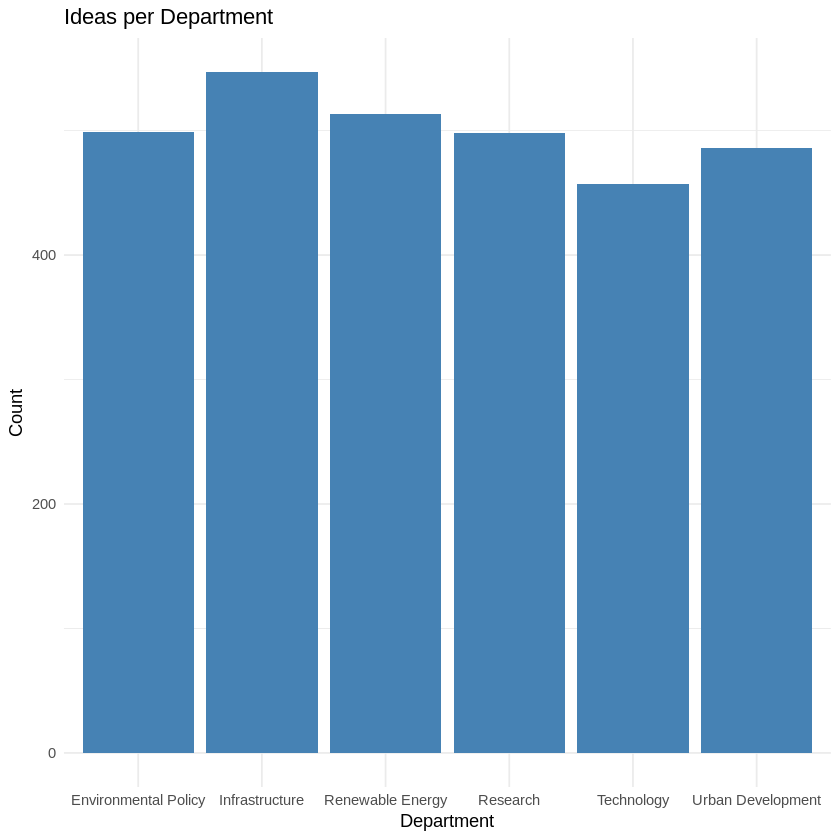

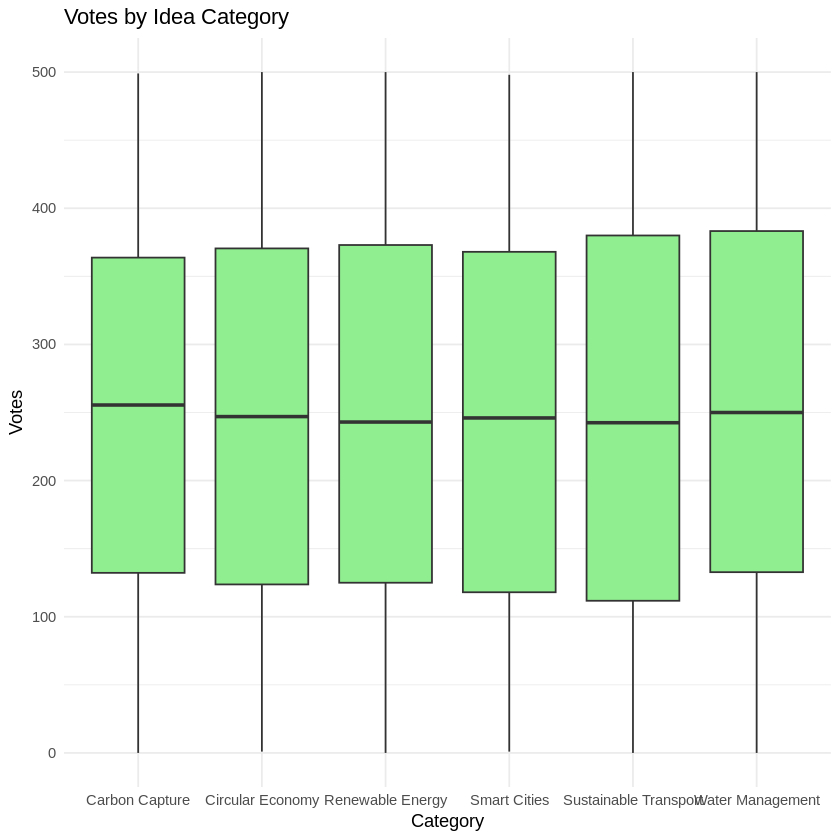

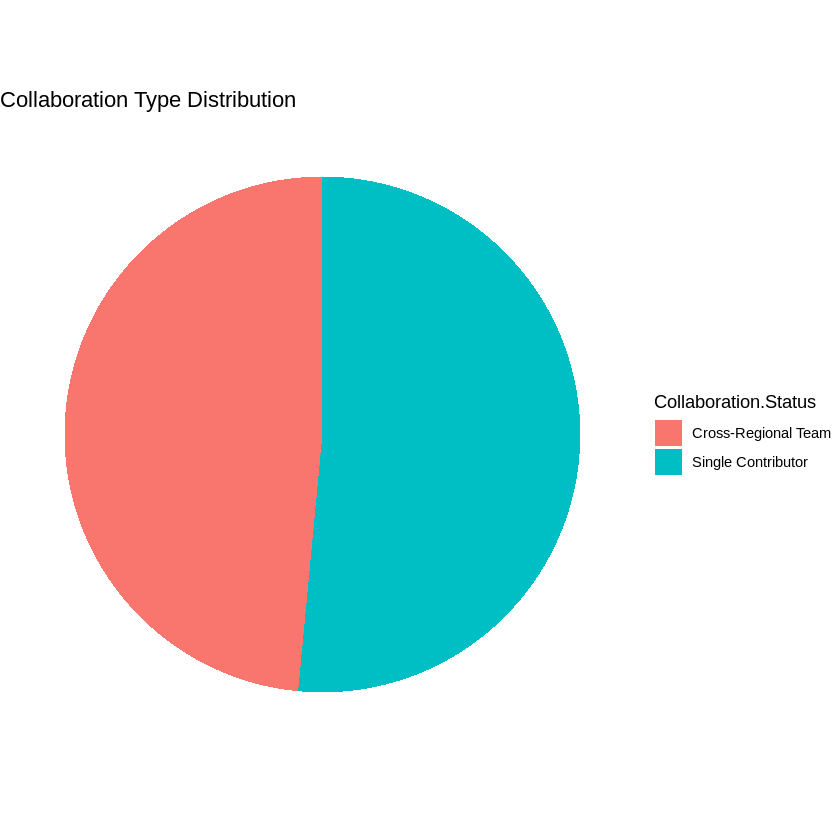

In [19]:
#Step 6; Visualisation using ggplot2

# Plot 1: Bar plot – Number of ideas per department
ggplot(data, aes(x = Department)) +
  geom_bar(fill = "steelblue") +
  theme_minimal() +
  labs(title = "Ideas per Department", x = "Department", y = "Count")

# Plot 2: Boxplot – Votes by Idea Category
ggplot(data, aes(x = `Idea.Category`, y = `Number.of.Votes`)) +
  geom_boxplot(fill = "lightgreen") +
  theme_minimal() +
  labs(title = "Votes by Idea Category", x = "Category", y = "Votes")

# Plot 3: Pie chart – Share of collaboration types
collab_data <- data %>%
  group_by(`Collaboration.Status`) %>%
  summarise(Count = n())

ggplot(collab_data, aes(x = "", y = Count, fill = `Collaboration.Status`)) +
  geom_col(width = 1) +
  coord_polar("y") +
  theme_void() +
  labs(title = "Collaboration Type Distribution")